In [2]:
import requests
import json
import pandas as pd

# Set the URL of the JSON data
urls = [ "https://api.blockchain.info/charts/hash-rate?timespan=1year&sampled=true&metadata=false&daysAverageString=7D&cors=true&format=json",
            "https://api.blockchain.info/charts/market-price?timespan=1year&sampled=true&metadata=false&daysAverageString=7D&cors=true&format=json",
            "https://api.blockchain.info/charts/transaction-fees?timespan=1year&sampled=true&metadata=false&daysAverageString=1d&cors=true&format=json",
            "https://api.blockchain.info/charts/market-price?timespan=1year&sampled=true&metadata=false&daysAverageString=1d&cors=true&format=json"
       ]

def get_link(link):
        # Send a GET request to the URL and get the JSON data
        response = requests.get(link)
        data = json.loads(response.text)
        return data["values"]


def extract_data(data_points):
        # Create a list to store the daily data
        dates = []
        values = []
        # Iterate through the data points and group them by day
        for point in data_points:
            timestamp = point["x"]
            dates.append(pd.to_datetime(timestamp, unit="s").date())
            values.append(point["y"])
        return list(zip(dates, values))

def scrape_data(link, col1, col2):
    
    data_points = get_link(link)
    daily_data = extract_data(data_points)
    # Convert the daily data to a Pandas DataFrame
    df= pd.DataFrame(daily_data, columns=[col1, col2])

    return df


In [5]:
#Scrape Total Hash Rate Graph
hash_rate = scrape_data(urls[0], "Date", "HashRate(TH/s)")
market_price_TH = scrape_data(urls[1], "Date", "MarketPrice(USD)")
TH = pd.merge(hash_rate, market_price_TH, on="Date")
TH.to_csv("TH.csv", index=False)
TH

,Date,HashRate(TH/s),MarketPrice(USD)
0,2022-06-11,2.278217e+08,30309.814286
1,2022-06-12,2.314284e+08,30220.907143
2,2022-06-13,2.277424e+08,30006.517143
3,2022-06-14,2.244975e+08,29533.938571
4,2022-06-15,2.215006e+08,28259.852857
...,...,...,...
359,2023-06-05,3.699977e+08,27412.148571
360,2023-06-06,3.632036e+08,27275.337143
361,2023-06-07,3.639544e+08,26989.985714
362,2023-06-08,3.631113e+08,26924.220000


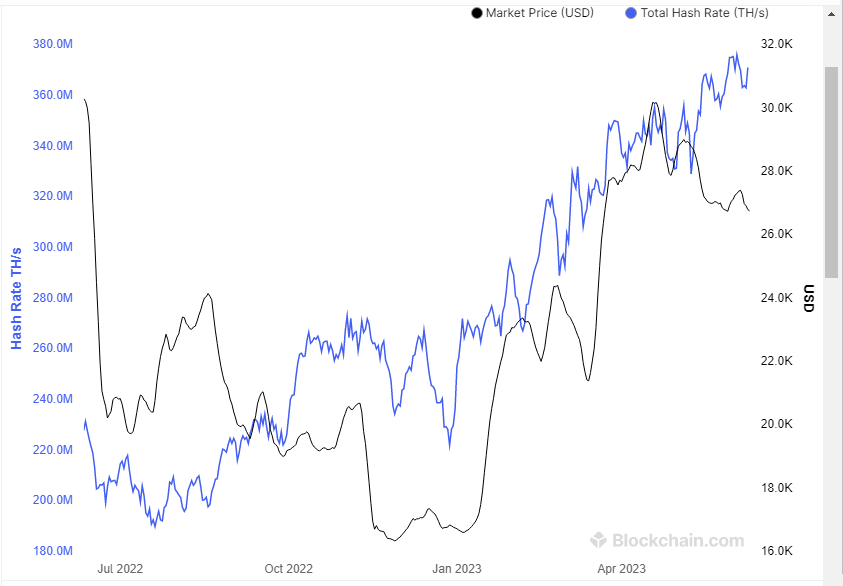

In [6]:
#Scrape Total Transaction Fees Graph
total_transactions = scrape_data(urls[2], "Date", "TotalTransactionFees(BTC)")
market_price_BTC = scrape_data(urls[3], "Date", "MarketPrice(USD)")
BTC = pd.merge(total_transactions, market_price_BTC, on=["Date"])
BTC.to_csv("BTC.csv", index=False)
BTC

,Date,TotalTransactionFees(BTC),MarketPrice(USD)
0,2022-06-11,11.279893,29059.41
1,2022-06-12,9.708081,28344.50
2,2022-06-13,28.147869,26593.30
3,2022-06-14,26.092144,22431.22
4,2022-06-15,25.765950,22189.29
...,...,...,...
359,2023-06-05,58.001145,27125.02
360,2023-06-06,82.922632,25747.20
361,2023-06-07,97.602338,27243.64
362,2023-06-08,69.545807,26352.20


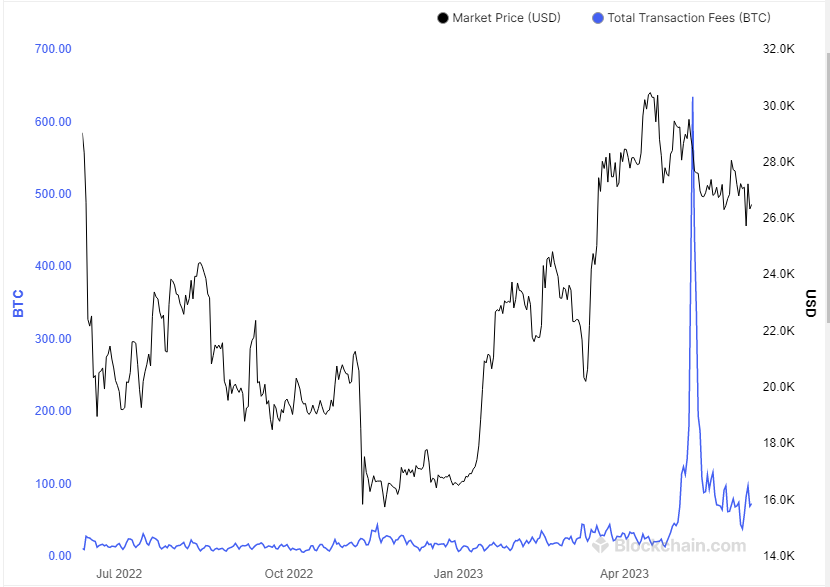